# MODELO DE ANALISIS DE SENTIMIENTOS - MACHINE LEARNING

Importamos las librerias

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import yellowbrick as yb
import sys
from sklearn.model_selection import train_test_split
import itertools
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juesg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juesg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Leemos el archivo CSV creado en el proceso de depuración de datos

In [63]:
df_ml = pd.read_csv(r'reviews.csv')

In [64]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49120 entries, 0 to 49119
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      49120 non-null  object
 1   user_url     49120 non-null  object
 2   funny        5782 non-null   object
 3   posted       49120 non-null  object
 4   last_edited  5124 non-null   object
 5   item_id      49120 non-null  int64 
 6   helpful      23326 non-null  object
 7   recommend    49120 non-null  bool  
 8   review       49093 non-null  object
 9   anio_posted  49120 non-null  int64 
dtypes: bool(1), int64(2), object(7)
memory usage: 3.4+ MB


Eliminaremos caracteres que pueden afectar el rendimiento del analisís

In [65]:
df_ml['review'] = df_ml['review'].str.replace("'s", "")
df_ml['review'] = df_ml['review'].str.replace(".", "")
df_ml['review'] = df_ml['review'].str.replace("``", "")
df_ml['review'] = df_ml['review'].str.replace(",", "")
df_ml['review'] = df_ml['review'].str.replace(".", "")
df_ml['review'] = df_ml['review'].str.replace("10", "good")
df_ml['review'] = df_ml['review'].str.replace('?', "")
df_ml['review'] = df_ml['review'].str.replace('!', "")


Con NLTK vamos a proceder a la Tokenización con el fin de pasar grandes cantidades de texto a porciones mas legibles para la interpretación del modelo:

1. Seleccionamos la columna reviews que es la que queremos tokenizar.
2. Pasamos el tipo de dato a string.
3. Tokenizamos los textos de la columna.
4. Luego tokenizamos las palabras.
5. Definimos la lista de stopwords.
6. A la tokenizacion de texto le sacamos las stopwords.
7. Retornamos el resultado listo para para el análisis de sentimientos.


In [66]:
def tokenizacion(x):
    if isinstance(x, str):
        # lista Stopwords
        stopwords_list = stopwords.words('english')
        stopwords_list = [word for word in stopwords_list if 'not' not in word]

        # Tokenización y eliminación de stopwords
        tokens = nltk.tokenize.sent_tokenize(x)
        tokens = [word for word in tokens if word.lower() not in stopwords_list]

        return ' '.join(tokens)
        #return tokens
    else:
        return x  # Devuelve tal cual si no es una cadena
    
# aplicamos la función de tokenización
df_ml['review'] = df_ml['review'].apply(lambda x: tokenizacion(x))

Decidí utilizar el compund directamente pues es el resultado compuesto del análisis de sentimiento, este nos indica para valores mayores a 0 un sentimiento positivos y menores negativos. De esta forma garantizamos también que los valores clasificados como neutros sean aquellos que eran nulos.

In [67]:
sid = SentimentIntensityAnalyzer()

def analyze_sentiment(text): # definición de la función
    if pd.isnull(text) or text == '': # Condicional la celda esta vacia se clasifica como neutro, osea 1
        return 1  
    sentiment_scores = sid.polarity_scores(text) # devuelve la calificación 
    sentiment = sentiment_scores.get('compound') # el metodo seleccionado en el compund matematico
    if sentiment > 0: # Si el compound es mayor a 0 se clasifica positivo
        return 2
    if sentiment < 0: # Si el compoun es menor a 0 se clasifica negativo
        return 0


df_ml['sentiment'] = df_ml['review'].apply(lambda x: analyze_sentiment(x)) # Aplicamos la función


Verificamos los clasificados como neutros

In [68]:
df_ml[df_ml['sentiment'] == 1]

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,anio_posted,sentiment
481,76561198070263209,http://steamcommunity.com/profiles/76561198070...,NaN,2013-12-13,NaN,570,NaN,True,,2013,1.0
683,Aurora99,http://steamcommunity.com/id/Aurora99,1 person found this review funny,2015-02-15,NaN,282440,0%,False,,2015,1.0
713,Azrafael,http://steamcommunity.com/id/Azrafael,NaN,2013-11-25,NaN,215530,0%,True,,2013,1.0
2217,76561198070792786,http://steamcommunity.com/profiles/76561198070...,1 person found this review funny,2015-08-14,NaN,329950,NaN,False,,2015,1.0
2276,staecrh,http://steamcommunity.com/id/staecrh,NaN,2014-11-28,NaN,8870,22%,False,,2014,1.0
...,...,...,...,...,...,...,...,...,...,...,...
47058,datmuffinfeel,http://steamcommunity.com/id/datmuffinfeel,NaN,2014-01-30,NaN,221100,NaN,True,,2014,1.0
47152,3X5G3,http://steamcommunity.com/id/3X5G3,NaN,2014-02-03,NaN,208090,NaN,True,,2014,1.0
47157,Salvotore,http://steamcommunity.com/id/Salvotore,NaN,2015-01-12,"Last edited July 20, 2015.",730,NaN,True,,2015,1.0
48332,76561198118697312,http://steamcommunity.com/profiles/76561198118...,NaN,2013-12-20,"Last edited January 16, 2015.",105600,NaN,True,,2013,1.0


Finalmente esta seria nuestra distribución por sentimiento.

In [69]:
df_ml['sentiment'].value_counts()

sentiment
2.0    32124
0.0     7690
1.0      169
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

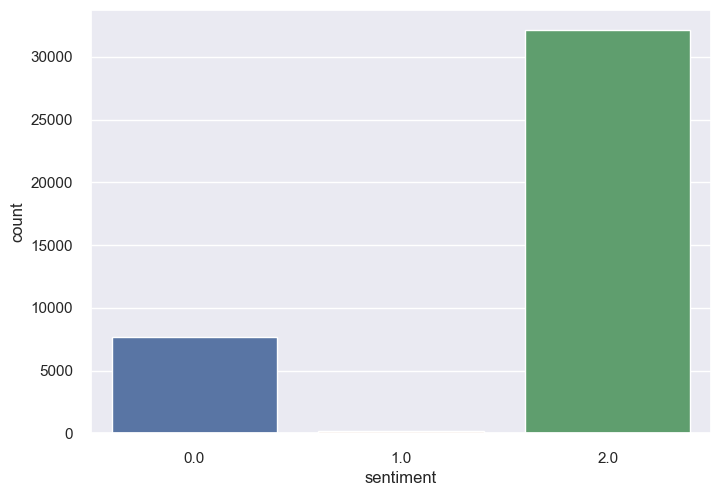

In [70]:
sns.countplot(df_ml, x=df_ml['sentiment'])

Creo archivo con la base de datos del modelo de sentimiento con el fin de utilizarlo en las funciones

In [71]:
df_ml.to_csv('recomendacion.csv',index=False)

Preparamos archivo para la función

In [72]:
games_sa = pd.read_csv(r'df_games_sentiment.csv')
recomendacion_sa = pd.read_csv(r'recomendacion.csv')
merged = pd.merge(recomendacion_sa, games_sa, left_on='item_id', right_on='id', how='left')
merged.dropna(subset=['release_date_anio'], inplace=True)
merged = merged[['release_date_anio','sentiment']]

Guardamos el archivo en un formato CSV para la función

In [73]:
merged.to_csv('merged_recomendacion.csv', index=False)